<a href="https://colab.research.google.com/github/makhlufiaero338/tugas-machine-learning/blob/main/week10/RegresiMLP_bank_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
file_path = '/content/drive/My Drive/bank.csv'
data = pd.read_csv(file_path, delimiter=';')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti path file sesuai lokasi file di Google Drive
file_path = '/content/drive/My Drive/bank.csv'

# Baca file
import pandas as pd
data = pd.read_csv(file_path, delimiter=';')

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

# Checking for missing values
missing_values = data.isnull().sum()

data_info, data_head, missing_values


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), objec

(None,
    age          job  marital  education default  balance housing loan  \
 0   30   unemployed  married    primary      no     1787      no   no   
 1   33     services  married  secondary      no     4789     yes  yes   
 2   35   management   single   tertiary      no     1350     yes   no   
 3   30   management  married   tertiary      no     1476     yes  yes   
 4   59  blue-collar  married  secondary      no        0     yes   no   
 
     contact  day month  duration  campaign  pdays  previous poutcome   y  
 0  cellular   19   oct        79         1     -1         0  unknown  no  
 1  cellular   11   may       220         1    339         4  failure  no  
 2  cellular   16   apr       185         1    330         1  failure  no  
 3   unknown    3   jun       199         4     -1         0  unknown  no  
 4   unknown    5   may       226         1     -1         0  unknown  no  ,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance  

In [12]:
# Reloading the dataset with the correct delimiter
data = pd.read_csv(file_path, delimiter=';')

# Display basic information and check for missing values after correction
data_info_corrected = data.info()
data_head_corrected = data.head()
missing_values_corrected = data.isnull().sum()

data_info_corrected, data_head_corrected, missing_values_corrected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


(None,
    age          job  marital  education default  balance housing loan  \
 0   30   unemployed  married    primary      no     1787      no   no   
 1   33     services  married  secondary      no     4789     yes  yes   
 2   35   management   single   tertiary      no     1350     yes   no   
 3   30   management  married   tertiary      no     1476     yes  yes   
 4   59  blue-collar  married  secondary      no        0     yes   no   
 
     contact  day month  duration  campaign  pdays  previous poutcome   y  
 0  cellular   19   oct        79         1     -1         0  unknown  no  
 1  cellular   11   may       220         1    339         4  failure  no  
 2  cellular   16   apr       185         1    330         1  failure  no  
 3   unknown    3   jun       199         4     -1         0  unknown  no  
 4   unknown    5   may       226         1     -1         0  unknown  no  ,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance  

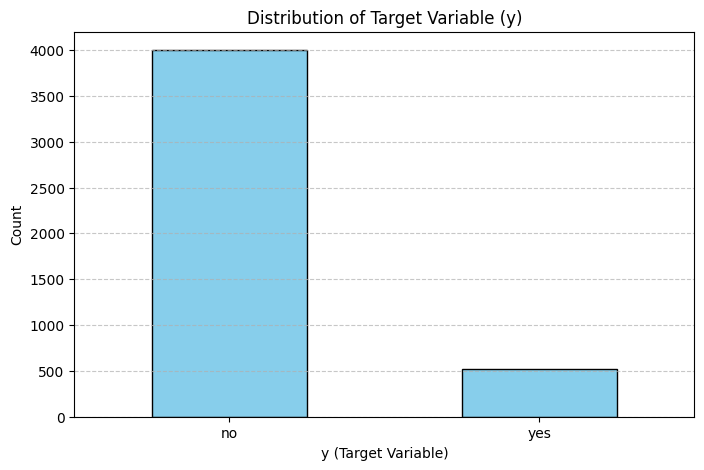

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [14]:
import matplotlib.pyplot as plt

# Statistical summary of the dataset
data_description = data.describe(include='all')  # Sertakan semua kolom, baik numerik maupun kategorikal

# Distribution of the target variable (y)
plt.figure(figsize=(8, 5))
data['y'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('y (Target Variable)')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Menjaga label sumbu x tetap horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

data_description


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting features and target
X = data.drop(columns='y')  # Semua kolom kecuali target
y = data['y']  # Kolom target

# Encoding target variable (yes -> 1, no -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3616, 16), (905, 16), (3616,), (905,))

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding untuk fitur kategorikal
categorical_columns = data.select_dtypes(include=['object']).drop(columns='y').columns
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Ubah 'sparse' menjadi 'sparse_output'
categorical_encoded = encoder.fit_transform(data[categorical_columns])

# Gabungkan data numerik dan kategorikal
numerical_columns = data.select_dtypes(include=['number']).columns
X_encoded = torch.tensor(
    pd.concat(
        [pd.DataFrame(categorical_encoded), data[numerical_columns].reset_index(drop=True)], axis=1
    ).values, dtype=torch.float32)

# Target variable
y_encoded = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Splitting data into training and testing sets
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# Creating DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Example batch size (this will be varied later)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a basic Vanilla MLP model
class MLPBinaryClassification(nn.Module):
    def __init__(self, input_size, hidden_layers, activation_fn):
        super(MLPBinaryClassification, self).__init__()
        layers = []
        # Input layer to first hidden layer
        layers.append(nn.Linear(input_size, hidden_layers[0]))
        layers.append(activation_fn())
        # Hidden layers
        for i in range(1, len(hidden_layers)):
            layers.append(nn.Linear(hidden_layers[i - 1], hidden_layers[i]))
            layers.append(activation_fn())
        # Output layer with sigmoid for binary classification
        layers.append(nn.Linear(hidden_layers[-1], 1))
        layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Example initialization
input_size = X_train_tensor.shape[1]  # Number of features
hidden_layers = [32, 16]  # Example configuration
activation_fn = nn.ReLU  # Example activation function

mlp_model = MLPBinaryClassification(input_size, hidden_layers, activation_fn)
mlp_model


MLPBinaryClassification(
  (model): Sequential(
    (0): Linear(in_features=42, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding untuk fitur kategorikal
categorical_columns = data.select_dtypes(include=['object']).drop(columns='y').columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(data[categorical_columns])

# Gabungkan data numerik dan kategorikal
numerical_columns = data.select_dtypes(include=['number']).columns
X_encoded = torch.tensor(
    pd.concat(
        [pd.DataFrame(categorical_encoded), data[numerical_columns].reset_index(drop=True)], axis=1
    ).values, dtype=torch.float32)

# Target variable
y_encoded = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# Creating DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Example batch size (this will be varied later)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a basic Vanilla MLP model for Binary Classification
class MLPBinaryClassification(nn.Module):
    def __init__(self, input_size, hidden_layers, activation_fn):
        super(MLPBinaryClassification, self).__init__()
        layers = []
        # Input layer to first hidden layer
        layers.append(nn.Linear(input_size, hidden_layers[0]))
        layers.append(activation_fn())
        # Hidden layers
        for i in range(1, len(hidden_layers)):
            layers.append(nn.Linear(hidden_layers[i - 1], hidden_layers[i]))
            layers.append(activation_fn())
        # Output layer with sigmoid for binary classification
        layers.append(nn.Linear(hidden_layers[-1], 1))
        layers.append(nn.Sigmoid())  # Sigmoid activation for binary classification
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Example initialization
input_size = X_train_tensor.shape[1]  # Number of features
hidden_layers = [32, 16]  # Example configuration
activation_fn = nn.ReLU  # Example activation function

mlp_model = MLPBinaryClassification(input_size, hidden_layers, activation_fn)

# Defining loss function and optimizer for binary classification
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)  # Example learning rate

# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        epoch_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_loss.append(epoch_loss / len(train_loader))
        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss[-1]:.4f}")
    return train_loss

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            test_loss += loss.item()

            # Convert probabilities to binary values (0 or 1)
            predicted_classes = (predictions > 0.5).float()
            correct_predictions += (predicted_classes == y_batch).sum().item()
            total_predictions += y_batch.size(0)

    test_loss /= len(test_loader)
    accuracy = correct_predictions / total_predictions
    return test_loss, accuracy

# Training the model (example with 50 epochs)
epochs = 50
train_loss = train_model(mlp_model, train_loader, criterion, optimizer, epochs)

# Evaluating the model
test_loss, accuracy = evaluate_model(mlp_model, test_loader, criterion)
print(f"Test Loss (BCELoss): {test_loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

train_loss, test_loss, accuracy


Epoch 1/50, Loss: 0.9393
Epoch 2/50, Loss: 0.4211
Epoch 3/50, Loss: 0.4981
Epoch 4/50, Loss: 0.4008
Epoch 5/50, Loss: 0.3530
Epoch 6/50, Loss: 0.4023
Epoch 7/50, Loss: 0.4546
Epoch 8/50, Loss: 0.3485
Epoch 9/50, Loss: 0.3371
Epoch 10/50, Loss: 0.3382
Epoch 11/50, Loss: 0.3492
Epoch 12/50, Loss: 0.3099
Epoch 13/50, Loss: 0.3137
Epoch 14/50, Loss: 0.3206
Epoch 15/50, Loss: 0.3034
Epoch 16/50, Loss: 0.3202
Epoch 17/50, Loss: 0.3558
Epoch 18/50, Loss: 0.3144
Epoch 19/50, Loss: 0.3031
Epoch 20/50, Loss: 0.3286
Epoch 21/50, Loss: 0.2891
Epoch 22/50, Loss: 0.2813
Epoch 23/50, Loss: 0.2988
Epoch 24/50, Loss: 0.3014
Epoch 25/50, Loss: 0.2894
Epoch 26/50, Loss: 0.2757
Epoch 27/50, Loss: 0.2888
Epoch 28/50, Loss: 0.2781
Epoch 29/50, Loss: 0.2734
Epoch 30/50, Loss: 0.4288
Epoch 31/50, Loss: 0.2732
Epoch 32/50, Loss: 0.2774
Epoch 33/50, Loss: 0.2658
Epoch 34/50, Loss: 0.2700
Epoch 35/50, Loss: 0.2674
Epoch 36/50, Loss: 0.2974
Epoch 37/50, Loss: 0.2553
Epoch 38/50, Loss: 0.2716
Epoch 39/50, Loss: 0.

([0.939262155080791,
  0.4211005991143463,
  0.4980819165970372,
  0.4008097164003195,
  0.35298455143924307,
  0.40226129488607426,
  0.4545868303198203,
  0.3484811694484896,
  0.33705363607248373,
  0.33818523533048883,
  0.34921619579591584,
  0.3099240976492916,
  0.3136704194862231,
  0.32057809954987165,
  0.3034488160525803,
  0.32016829167187744,
  0.35584869921471163,
  0.3143699450698574,
  0.30312994135692056,
  0.3286123164327799,
  0.28906955550202224,
  0.2812675492162198,
  0.29877571580288687,
  0.30138781534886994,
  0.28942162381996095,
  0.2757032521860262,
  0.28876095990427825,
  0.27811046406231094,
  0.27341938486932654,
  0.42879796661106884,
  0.273196562992788,
  0.2773620848898339,
  0.2658478824207477,
  0.2700365198265135,
  0.2673510273473453,
  0.29741275689638824,
  0.25529069624907147,
  0.27162138201230396,
  0.25271222911841046,
  0.2585125823332145,
  0.26096759202469766,
  0.27798388182985045,
  0.2653044972535783,
  0.29675046090794877,
  0.254293